# 1-2. Import libraries and Data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
%matplotlib inline

In [38]:
#Create path
path = '/Users/owner/Documents/Career foundry/Course 6'

In [39]:
# Import data
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'gun_violence_totals.csv'))

In [40]:
df.head()

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
0,0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,2022,5,28,5,1
1,1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,2022,5,28,5,1
2,2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,2022,5,28,5,1
3,3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2022,5,28,5,2
4,4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,2022,5,28,5,1


In [41]:
df = df[df['date'].between('2014-01-01','2021-12-31')]

In [42]:
df_totals = pd.read_csv(os.path.join(path, 'Cleaned Data', 'total_injured_and_killed.csv'))

# 3. Clean data

In [43]:
df_totals.head()

,Unnamed: 0,state,people_killed,people_injured,total_hurt
0,0,Vermont,120,147,267
1,1,Wyoming,139,96,235
2,2,North Dakota,153,225,378
3,3,Rhode Island,161,581,742
4,4,Hawaii,170,191,361


In [44]:
df_totals=df_totals.drop(columns = ['Unnamed: 0'])

In [45]:
df_totals.isnull().sum()

state             0
people_killed     0
people_injured    0
total_hurt        0
dtype: int64

In [46]:
df.isnull().sum()

Unnamed: 0            0
incident_id           0
date                  0
state                 0
city                  0
address           23257
people_killed         0
people_injured        0
year                  0
month                 0
monthday              0
day_of_week           0
hurt                  0
dtype: int64

In [47]:
df_totals.describe()

,people_killed,people_injured,total_hurt
count,51.000000,51.000000,51.000000
mean,2657.666667,5204.411765,7862.078431
std,2782.309254,5658.854606,8209.623258
min,120.000000,96.000000,235.000000
25%,542.500000,1223.000000,1868.500000
50%,1819.000000,3010.000000,4888.000000
75%,3857.500000,7784.000000,11895.500000
max,11880.000000,28784.000000,36314.000000


In [48]:
df_totals.shape

(51, 4)

In [49]:
dups = df_totals.duplicated()

In [50]:
dups.shape

(51,)

In [51]:
dups_2 = df.duplicated()

In [52]:
dups_2.shape

(453478,)

# 4. Explore data visually

/var/folders/l9/r6mq8fk51_z31zfmx7sx2ggc0000gn/T/ipykernel_27323/1670899836.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hurt'], bins=20) # Shows extreme values


<Axes: xlabel='hurt', ylabel='Density'>

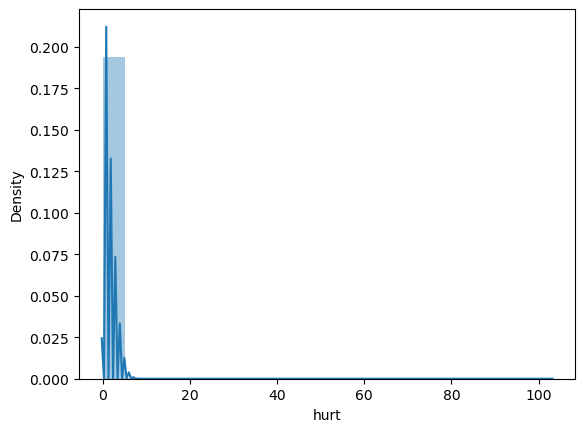

In [53]:
sns.distplot(df['hurt'], bins=20) # Shows extreme values

/var/folders/l9/r6mq8fk51_z31zfmx7sx2ggc0000gn/T/ipykernel_27323/2618011073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_totals['total_hurt'], bins=20) # Shows extreme values


<Axes: xlabel='total_hurt', ylabel='Density'>

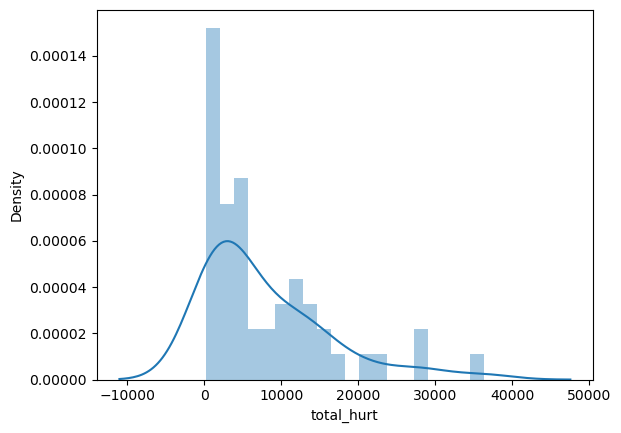

In [54]:
sns.distplot(df_totals['total_hurt'], bins=20) # Shows extreme values

In [55]:
df_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           51 non-null     object
 1   people_killed   51 non-null     int64 
 2   people_injured  51 non-null     int64 
 3   total_hurt      51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [56]:
#create a sample from larger data set 
sample = df.sample(n=5000)
sample.head()

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
33162,33162,2118729,2021-09-11,Missouri,Kansas City,6700 block of Manchester Ave,1,1,2021,9,11,5,2
137297,137297,1585759,2020-01-01,Ohio,Cleveland,East 55th St and Kinsman Rd,0,1,2020,1,1,2,1
38032,38032,2086646,2021-08-09,Delaware,Dover,995 Whatcoat Dr,0,0,2021,8,9,0,0
31751,31751,2122638,2021-09-21,Georgia,Lagrange,220 Fort Dr,0,0,2021,9,21,1,0
405603,405603,326237,2015-04-19,Florida,Jacksonville,1800 block of West 25th Street,0,3,2015,4,19,6,3


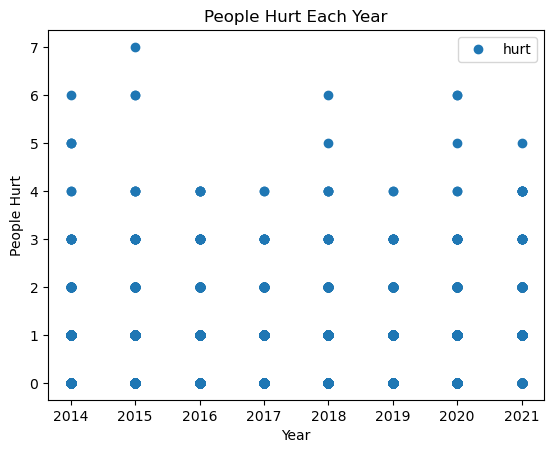

In [57]:
# Create a scatterplot comparing people hurt and year

sample.plot(x = 'year', y= 'hurt' ,style='o') 
plt.title('People Hurt Each Year')  
plt.xlabel('Year')  
plt.ylabel('People Hurt')  
plt.show()

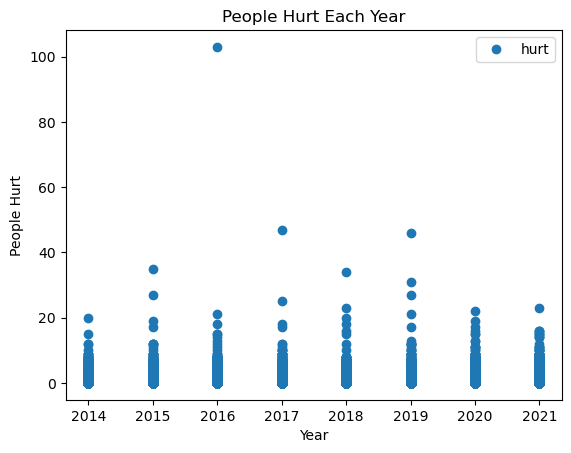

In [58]:
# Create a scatterplot comparing people hurt and year

df.plot(x = 'year', y= 'hurt' ,style='o') 
plt.title('People Hurt Each Year')  
plt.xlabel('Year')  
plt.ylabel('People Hurt')  
plt.show()

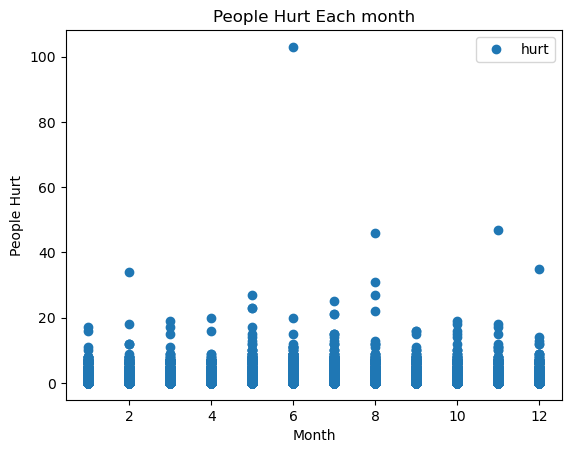

In [59]:
# Create a scatterplot comparing people hurt and month

df.plot(x = 'month', y= 'hurt' ,style='o') 
plt.title('People Hurt Each month')  
plt.xlabel('Month')  
plt.ylabel('People Hurt')  
plt.show()

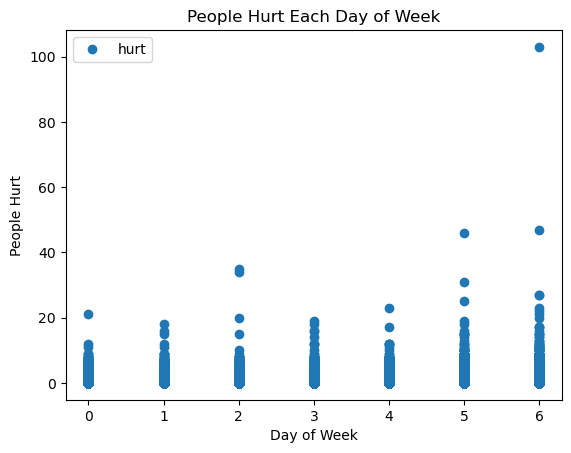

In [60]:
# Create a scatterplot comparing people hurt and day of week

df.plot(x = 'day_of_week', y= 'hurt' ,style='o') 
plt.title('People Hurt Each Day of Week')  
plt.xlabel('Day of Week')  
plt.ylabel('People Hurt')  
plt.show()

# Hypothesis

The later in the week, the higher the number of gun violences. 
The states in the south have more gun violence incidents than the North

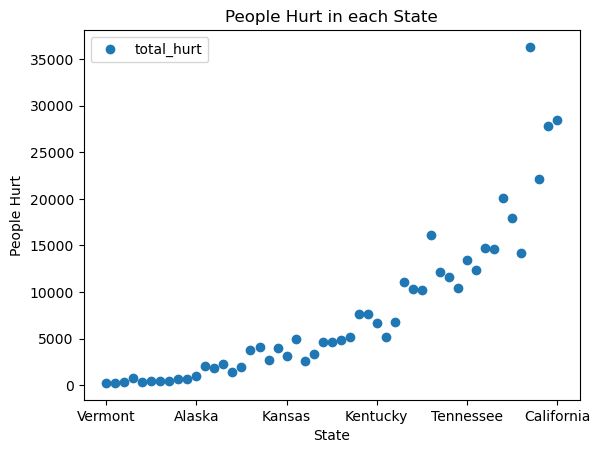

In [61]:
# Create a scatterplot comparing people hurt and day of week

df_totals.plot(x = 'state', y= 'total_hurt' ,style='o') 
plt.title('People Hurt in each State')  
plt.xlabel('State')  
plt.ylabel('People Hurt')  
plt.show()

This shows an upward trend, but it does not show me each state. 

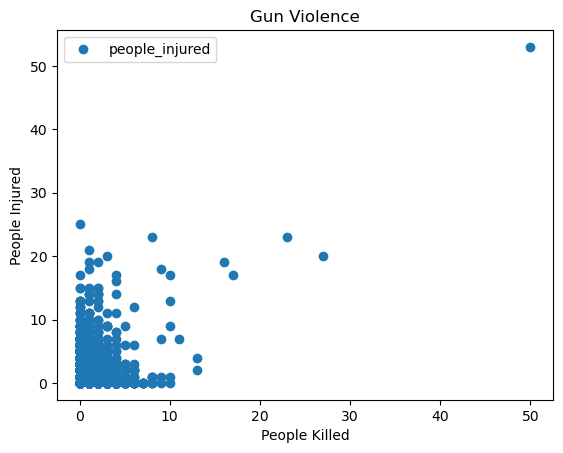

In [62]:
# Create a scatterplot comparing people hurt and day of week

df.plot(x = 'people_killed', y= 'people_injured' ,style='o') 
plt.title('Gun Violence')  
plt.xlabel('People Killed')  
plt.ylabel('People Injured')  
plt.show()

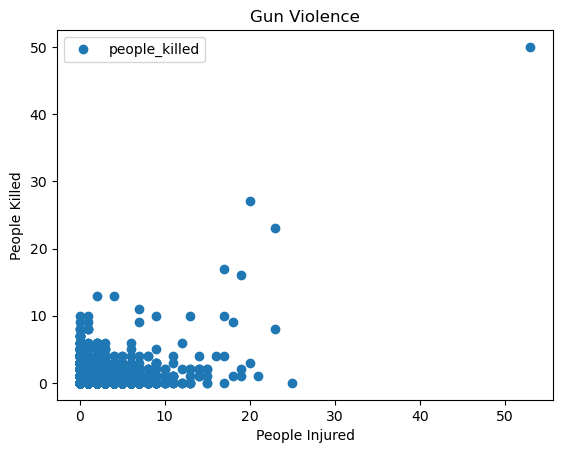

In [63]:
# Create a scatterplot comparing people hurt and day of week

sub_sample = df.sample(n=5000)

df.plot(x = 'people_injured', y= 'people_killed' ,style='o') 
plt.title('Gun Violence')  
plt.xlabel('People Injured')  
plt.ylabel('People Killed')  
plt.show()

In [64]:
#reshape variables for regression 
Xs = sub_sample['people_injured'].values.reshape(-1, 1)
ys = sub_sample['people_killed'].values.reshape(-1, 1)

In [65]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 0)

In [66]:
#create linear regression object
sub_regression = LinearRegression()

In [67]:
#fit regression to training set
sub_regression.fit(Xs_train, ys_train)

LinearRegression()

In [68]:
ys_predicted = sub_regression.predict(Xs_test)

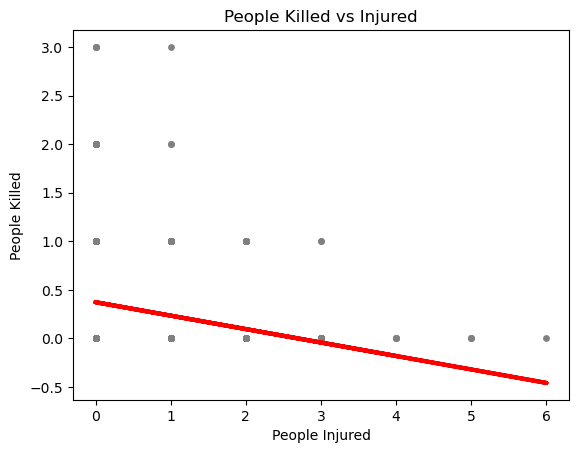

In [69]:
plot_test = plt
plot_test.scatter(Xs_test, ys_test, color='gray', s = 15)
plot_test.plot(Xs_test, ys_predicted, color='red', linewidth =3)
plot_test.title('People Killed vs Injured')
plot_test.xlabel('People Injured')
plot_test.ylabel('People Killed')
plot_test.show()

In [70]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(ys_test, ys_predicted)
r2 = r2_score(ys_test, ys_predicted)

In [71]:
# Print the model summary statistics

print('Slope:' ,sub_regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.13846903]]
Mean squared error:  0.24152292607431075
R2 score:  0.06564159863549912


Indicate a poorly fitting model

In [72]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': ys_test.flatten(), 'Predicted': ys_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,-0.181204
1,0,0.372672
2,0,-0.319673
3,0,0.234203
4,0,0.095734
5,0,0.234203
6,0,0.372672
7,0,0.234203
8,0,0.372672
9,1,0.372672


When comparing the predicted values to actual values, it supports the poor fit of the model. 

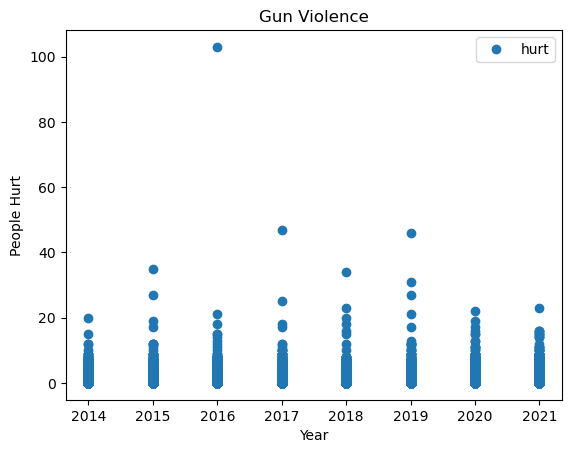

In [73]:
# Create a scatterplot comparing people hurt and day of week

sub_sample = df.sample(n=5000)

df.plot(x = 'year', y= 'hurt' ,style='o') 
plt.title('Gun Violence')  
plt.xlabel('Year')  
plt.ylabel('People Hurt')  
plt.show()

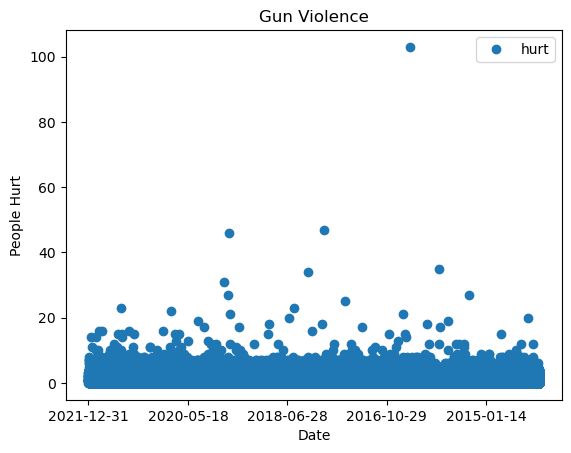

In [74]:
# Create a scatterplot comparing people hurt and day of week

sub_sample = df.sample(n=5000)

df.plot(x = 'date', y= 'hurt' ,style='o') 
plt.title('Gun Violence')  
plt.xlabel('Date')  
plt.ylabel('People Hurt')  
plt.show()

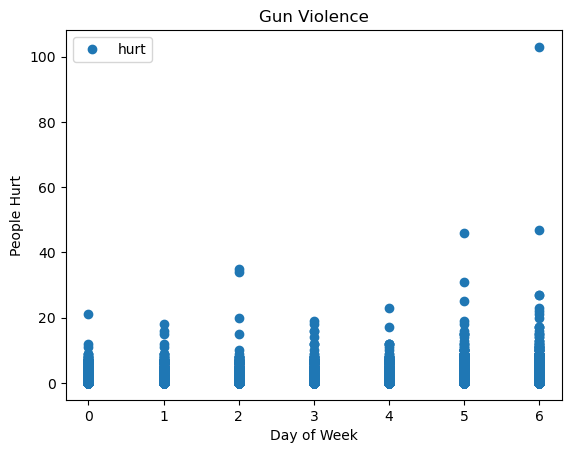

In [75]:
# Create a scatterplot comparing people hurt and day of week

sub_sample = df.sample(n=5000)

df.plot(x = 'day_of_week', y= 'hurt' ,style='o') 
plt.title('Gun Violence')  
plt.xlabel('Day of Week')  
plt.ylabel('People Hurt')  
plt.show()

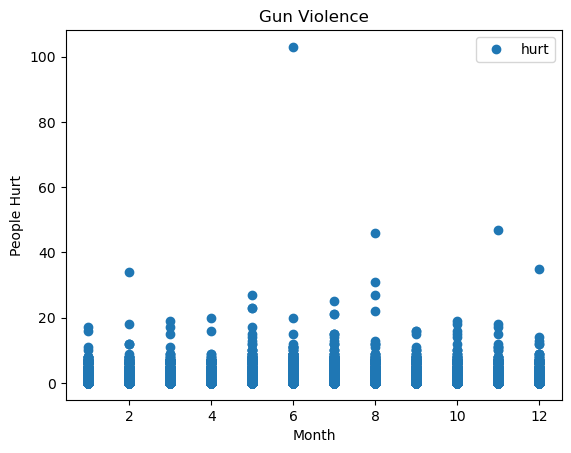

In [76]:
# Create a scatterplot comparing people hurt and day of week

sub_sample = df.sample(n=5000)

df.plot(x = 'month', y= 'hurt' ,style='o') 
plt.title('Gun Violence')  
plt.xlabel('Month')  
plt.ylabel('People Hurt')  
plt.show()